In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Utilizador\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
police = pd.read_csv('fatal-police-shootings-data.csv')
police.shape

(7110, 17)

In [4]:
police.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [6]:
police.isnull().sum()

id                            0
name                        324
date                          0
manner_of_death               0
armed                       209
age                         380
gender                        5
race                       1171
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        595
body_camera                   0
longitude                   683
latitude                    683
is_geocoding_exact            0
dtype: int64

In [7]:
# drop rows with 'race' null
police=police[police['race'].notna()]
police.isnull().sum()

id                           0
name                        45
date                         0
manner_of_death              0
armed                      199
age                        114
gender                       1
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       380
body_camera                  0
longitude                  331
latitude                   331
is_geocoding_exact           0
dtype: int64

In [8]:
police.drop(columns=['name'],inplace=True)

In [9]:
police=police[police['gender'].notna()]
police.isnull().sum()

id                           0
date                         0
manner_of_death              0
armed                      199
age                        114
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       380
body_camera                  0
longitude                  330
latitude                   330
is_geocoding_exact           0
dtype: int64

In [10]:
police['race'].value_counts()

W    3014
B    1592
H    1088
A     106
N      91
O      47
Name: race, dtype: int64

In [11]:
police['race'].replace({'N':'O'},inplace=True)

In [63]:
# make a copy of the dataset
police_final=police.drop(columns=['date','manner_of_death','armed','city','signs_of_mental_illness','threat_level','body_camera','longitude','latitude','is_geocoding_exact'])

In [64]:
police_final.isnull().sum()

id            0
age         114
gender        0
race          0
state         0
flee        380
age_bins    114
dtype: int64

In [65]:
police_final['flee'].replace({'Car':'Yes','Foot':'Yes','Other':'Yes','Not fleeing':'No'},inplace=True)
police_final=police_final[police_final['flee'].notna()]
police_final=police_final[police_final['age'].notna()]

In [66]:
police_final.isnull().sum()

id          0
age         0
gender      0
race        0
state       0
flee        0
age_bins    0
dtype: int64

In [78]:
# turn age into bins
# first change age type to int
police_final=police_final.astype({'age':'int32'})
bins=[0,12,18,35,50, police_final['age'].max()]
police_final['age_bins']=pd.cut(police_final['age'], bins=bins,labels=["<12","12-18","18-35","35-50",">50"])
#police[['age','age_bins']]

In [79]:
police_final['age_bins'].value_counts()

18-35    2712
35-50    1704
>50       833
12-18     204
<12         3
Name: age_bins, dtype: int64

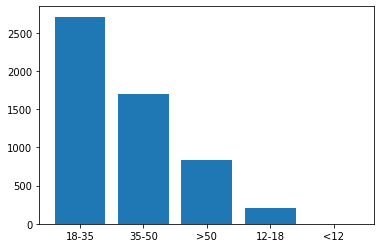

In [80]:
plt.bar(police_final['age_bins'].value_counts().index, police_final['age_bins'].value_counts().values)
plt.show()

In [110]:
police_final['race'].value_counts()

W    2772
B    1471
H     990
O     125
A      98
Name: race, dtype: int64

### Create dataframe with the population by race, pop by age, pop by state and pop by gender in usa

In [130]:
# for the states we'll need a dictionary to pass from state name to state abbreviation

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [502]:
#states=pd.read_html('https://www.infoplease.com/us/states/state-population-by-rank')
#states=states[0]
#states.head(2)
states = pd.read_excel('poverty_state_2.xlsx')
states.head(2)

,STATE,Total,Below poverty,Standard error,Percent,Standard error.1
0,Alabama,4885,727,84,14.9,1.8
1,Alaska,705,94,9,13.3,1.3


In [503]:
states2=states.replace({'STATE':us_state_to_abbrev})
states2.rename(columns={'STATE':'state', 'Total':'population_states','Below poverty':'N_poor_by_state'},inplace=True)
states2.drop(columns=['Standard error','Percent','Standard error.1'],inplace=True)
states2['population_states']=states2['population_states']*1000
states2['N_poor_by_state']=states2['N_poor_by_state']*1000


In [504]:
population_race = pd.DataFrame(data=np.array([['W',191698000],['H',62080000],['B',39940000],['A',19619000],['O',18113000]]), columns=['race','population_race'])
population_gender = pd.DataFrame(data=np.array([['M',162826299],['F',166238618]]), columns=['gender','population_gender'])
#population_age = pd.DataFrame(data=np.array([]), columns=['Population_Race']                                
population_states=states2.copy()#.drop(columns=['Rank','Percent of Total'])

In [505]:
# Merge the information regarding all population with the information of police killings
final = police_final.merge(population_race, how='inner', left_on='race', right_on='race')
final = final.merge(population_gender, how='inner', left_on='gender', right_on='gender')
final = final.merge(population_states, how='inner', left_on='state', right_on='state')

In [506]:
final.head(2)
(final.groupby('state').agg({'population_states':'max','N_poor_by_state':'max'})).sum()

population_states    325714000
N_poor_by_state       37248000
dtype: int64

In [507]:
# with this excel file I could already insert the number of poor by state

## Now it's time to merge information regarding race, gender, poverty and state of the all country

### Race

In [508]:
race = pd.read_excel('poverty_race_2.xlsx')
race.head(2)

,Year,Total,White alone (22),"White alone, not Hispanic (22)",Black alone or in combination,Black alone (24),Asian alone or in combination,Asian alone (25),Hispanic (any race) (26)
0,2020,37247.0,25007,15942,9219,8472,1808,1629,10409
1,2019,33984.0,22512,14152,8836,8073,1588,1464,9545


In [509]:
# until 2002 we have all values. Before 2002 there are missing values so i'll filter that dataset
# to have only values until 2002
#race=race[:21]
race=race[:1]

In [510]:
# Keep only columns that are 'race' alone
race = race.drop(columns=['White alone (22)', 'Black alone or in combination','Asian alone or in combination'])
race=race.astype({'Total':'int32','White alone, not Hispanic (22)':'int32','Black alone (24)':'int32','Asian alone (25)':'int32','Hispanic (any race) (26)':'int32'})
race.dtypes

Year                              object
Total                              int32
White alone, not Hispanic (22)     int32
Black alone (24)                   int32
Asian alone (25)                   int32
Hispanic (any race) (26)           int32
dtype: object

In [511]:
# Calculate the amount of 'other' race
race['Total_2']=race.loc[:,'White alone, not Hispanic (22)':'Hispanic (any race) (26)'].sum(axis=1)
race['Other']=race['Total']-race['Total_2']
race.head()

,Year,Total,"White alone, not Hispanic (22)",Black alone (24),Asian alone (25),Hispanic (any race) (26),Total_2,Other
0,2020,37247,15942,8472,1629,10409,36452,795


In [512]:
race.drop(columns=['Total_2'], inplace=True)
race.rename(columns={'White alone, not Hispanic (22)':'W','Black alone (24)':'B','Asian alone (25)':'A','Hispanic (any race) (26)':'H','Other':'O'},inplace=True)

In [513]:
columns = ['Year', 'Total']
race = pd.melt(race,columns, var_name='race', value_name='N_poor_by_race')
race.head()

,Year,Total,race,N_poor_by_race
0,2020,37247,W,15942
1,2020,37247,B,8472
2,2020,37247,A,1629
3,2020,37247,H,10409
4,2020,37247,O,795


In [514]:
#race=(race.groupby('race').agg({'N_poor_by_race':'mean'}).reset_index().round(0))
#race

In [515]:
# Number are in thousands. Need to convert
race['N_poor_by_race']=race['N_poor_by_race']*1000
#race['Total']=race['Total']*1000
race.drop(columns=['Year','Total'],inplace=True)

### Gender

In [516]:
gender = pd.read_excel('poverty_gender_2.xlsx')
gender.drop(columns=['Unnamed: 0'],inplace=True)
gender=gender[:1]
gender.values[0][0]

16334.0

In [517]:
gender = pd.DataFrame(data=([['M',gender.values[0][0]],['F',gender.values[0][1]]]), columns=['gender','N_poor_by_gender'])

In [518]:
gender

,gender,N_poor_by_gender
0,M,16334.0
1,F,20912.0


In [519]:
gender['N_poor_by_gender']=gender['N_poor_by_gender']*1000

In [520]:
final = final.merge(race, how='inner', left_on='race', right_on='race')
final = final.merge(gender, how='inner', left_on='gender', right_on='gender')

In [521]:
final.head(2)

,id,age,gender,race,state,flee,age_bins,population_race,population_gender,population_states,N_poor_by_state,N_poor_by_race,N_poor_by_gender
0,3,53,M,A,WA,No,>50,19619000,162826299,7588000,628000,1629000,16334000.0
1,1957,44,M,A,WA,No,35-50,19619000,162826299,7588000,628000,1629000,16334000.0


In [522]:
final['Total_Population']=states2['population_states'].sum()

In [523]:
final.head()

,id,age,gender,race,state,flee,age_bins,population_race,population_gender,population_states,N_poor_by_state,N_poor_by_race,N_poor_by_gender,Total_Population
0,3,53,M,A,WA,No,>50,19619000,162826299,7588000,628000,1629000,16334000.0,325714000
1,1957,44,M,A,WA,No,35-50,19619000,162826299,7588000,628000,1629000,16334000.0,325714000
2,2666,20,M,A,WA,No,18-35,19619000,162826299,7588000,628000,1629000,16334000.0,325714000
3,2757,22,M,A,WA,No,18-35,19619000,162826299,7588000,628000,1629000,16334000.0,325714000
4,4332,36,M,A,WA,Yes,35-50,19619000,162826299,7588000,628000,1629000,16334000.0,325714000


In [524]:
final=final.astype({'population_race':'int64','population_gender':'int64','N_poor_by_gender':'int64'})

In [525]:
final.head()

,id,age,gender,race,state,flee,age_bins,population_race,population_gender,population_states,N_poor_by_state,N_poor_by_race,N_poor_by_gender,Total_Population
0,3,53,M,A,WA,No,>50,19619000,162826299,7588000,628000,1629000,16334000,325714000
1,1957,44,M,A,WA,No,35-50,19619000,162826299,7588000,628000,1629000,16334000,325714000
2,2666,20,M,A,WA,No,18-35,19619000,162826299,7588000,628000,1629000,16334000,325714000
3,2757,22,M,A,WA,No,18-35,19619000,162826299,7588000,628000,1629000,16334000,325714000
4,4332,36,M,A,WA,Yes,35-50,19619000,162826299,7588000,628000,1629000,16334000,325714000


In [526]:
final.drop(columns=['id'],inplace=True)

In [527]:
# P(race|killed), P(gender|killed) and P(state|killed)

race_knowing_was_killed=final.groupby('race').apply(lambda x : x['age'].count()/len(final)).reset_index().round(3)
race_knowing_was_killed.rename(columns={0:'prob_race_knowing_was_killed'},inplace=True)
final = final.merge(race_knowing_was_killed, how='inner', left_on='race', right_on='race')

gender_knowing_was_killed=final.groupby('gender').apply(lambda x : x['age'].count()/len(final)).reset_index().round(3)
gender_knowing_was_killed.rename(columns={0:'prob_gender_knowing_was_killed'},inplace=True)
final = final.merge(gender_knowing_was_killed, how='inner', left_on='gender', right_on='gender')

state_knowing_was_killed=final.groupby('state').apply(lambda x : x['age'].count()/len(final)).reset_index().round(3)
state_knowing_was_killed.rename(columns={0:'prob_state_knowing_was_killed'},inplace=True)
final = final.merge(state_knowing_was_killed, how='inner', left_on='state', right_on='state')

In [528]:
final.head()

,age,gender,race,state,flee,age_bins,population_race,population_gender,population_states,N_poor_by_state,N_poor_by_race,N_poor_by_gender,Total_Population,prob_race_knowing_was_killed,prob_gender_knowing_was_killed,prob_state_knowing_was_killed
0,53,M,A,WA,No,>50,19619000,162826299,7588000,628000,1629000,16334000,325714000,0.018,0.953,0.025
1,44,M,A,WA,No,35-50,19619000,162826299,7588000,628000,1629000,16334000,325714000,0.018,0.953,0.025
2,20,M,A,WA,No,18-35,19619000,162826299,7588000,628000,1629000,16334000,325714000,0.018,0.953,0.025
3,22,M,A,WA,No,18-35,19619000,162826299,7588000,628000,1629000,16334000,325714000,0.018,0.953,0.025
4,36,M,A,WA,Yes,35-50,19619000,162826299,7588000,628000,1629000,16334000,325714000,0.018,0.953,0.025


In [529]:
# Probabilities of race, gender and age regarding all population
final['prob_race']=final['population_race']/final['Total_Population']
final['prob_gender']=final['population_gender']/final['Total_Population']
final['prob_state']=final['population_states']/final['Total_Population']

In [530]:
final.head(2)

,age,gender,race,state,flee,age_bins,population_race,population_gender,population_states,N_poor_by_state,N_poor_by_race,N_poor_by_gender,Total_Population,prob_race_knowing_was_killed,prob_gender_knowing_was_killed,prob_state_knowing_was_killed,prob_race,prob_gender,prob_state
0,53,M,A,WA,No,>50,19619000,162826299,7588000,628000,1629000,16334000,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297
1,44,M,A,WA,No,35-50,19619000,162826299,7588000,628000,1629000,16334000,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297


In [531]:
final['prob_killed_knowing_race']=final['prob_race_knowing_was_killed']/final['prob_race']
final['prob_killed_knowing_gender']=final['prob_gender_knowing_was_killed']/final['prob_gender']
final['prob_killed_knowing_state']=final['prob_state_knowing_was_killed']/final['prob_state']

In [532]:
final.head()

,age,gender,race,state,flee,age_bins,population_race,population_gender,population_states,N_poor_by_state,...,Total_Population,prob_race_knowing_was_killed,prob_gender_knowing_was_killed,prob_state_knowing_was_killed,prob_race,prob_gender,prob_state,prob_killed_knowing_race,prob_killed_knowing_gender,prob_killed_knowing_state
0,53,M,A,WA,No,>50,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122
1,44,M,A,WA,No,35-50,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122
2,20,M,A,WA,No,18-35,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122
3,22,M,A,WA,No,18-35,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122
4,36,M,A,WA,Yes,35-50,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122


In [533]:
#final['prob_killed_knowing_race_norm']=final['prob_killed_knowing_race']/final['prob_killed_knowing_race'].sum()
#final['prob_killed_knowing_gender_norm']=final['prob_killed_knowing_gender']/final['prob_killed_knowing_gender'].sum()
#final['prob_killed_knowing_state_norm']=final['prob_killed_knowing_state']/final['prob_killed_knowing_state'].sum()

In [534]:
final.head()

,age,gender,race,state,flee,age_bins,population_race,population_gender,population_states,N_poor_by_state,...,Total_Population,prob_race_knowing_was_killed,prob_gender_knowing_was_killed,prob_state_knowing_was_killed,prob_race,prob_gender,prob_state,prob_killed_knowing_race,prob_killed_knowing_gender,prob_killed_knowing_state
0,53,M,A,WA,No,>50,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122
1,44,M,A,WA,No,35-50,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122
2,20,M,A,WA,No,18-35,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122
3,22,M,A,WA,No,18-35,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122
4,36,M,A,WA,Yes,35-50,19619000,162826299,7588000,628000,...,325714000,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122


In [535]:
k=(final.groupby('gender').agg({'prob_killed_knowing_gender':'max'}))
k

,prob_killed_knowing_gender
gender,
F,0.092088
M,1.906359


<BarContainer object of 5456 artists>

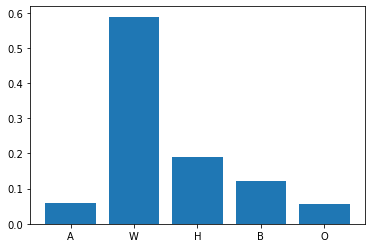

In [536]:
plt.bar(final['race'],final['prob_race'])

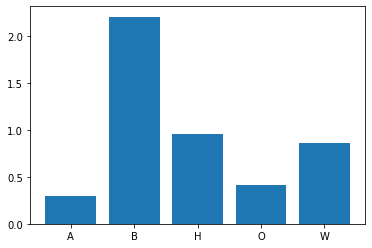

In [537]:
plt.bar((final.groupby('race')['prob_killed_knowing_race'].max()).index,(final.groupby('race')['prob_killed_knowing_race'].max()).values)
plt.show()


## Assumption: The majority of people killed by police are poor (live in poor neighboors, violent crimes,etc)

In [ ]:
# P(race and poor), P(gender and poor), P(state and poor)

# Assumption: P(race and poor | killed) = P(race| killed)

# P(killed | race and poor) = P(race and poor | killed) / P(race and poor)
# P(race and poor) = P(race | poor) * P(poor) 
#        --> P(killed | race and poor) = P(race and poor | killed) / (P(race | poor) * P(poor))
#        --> P(killed | race and poor) = P(race | killed) / (P(race | poor) * P(poor))

In [538]:
final.columns

Index(['age', 'gender', 'race', 'state', 'flee', 'age_bins', 'population_race',
       'population_gender', 'population_states', 'N_poor_by_state',
       'N_poor_by_race', 'N_poor_by_gender', 'Total_Population',
       'prob_race_knowing_was_killed', 'prob_gender_knowing_was_killed',
       'prob_state_knowing_was_killed', 'prob_race', 'prob_gender',
       'prob_state', 'prob_killed_knowing_race', 'prob_killed_knowing_gender',
       'prob_killed_knowing_state'],
      dtype='object')

In [548]:
p_poor=((final.groupby('race').agg({'N_poor_by_race':'max'})).sum()/final['Total_Population'].max()).values[0]

In [549]:
p_poor

0.11435492487274111

In [554]:
k=(final.groupby('race').agg({'N_poor_by_race':'max'})).reset_index()
k['prob_race_knowing_poor'] = k['N_poor_by_race']/k['N_poor_by_race'].sum()
k

,race,N_poor_by_race,prob_race_knowing_poor
0,A,1629000,0.043735
1,B,8472000,0.227455
2,H,10409000,0.279459
3,O,795000,0.021344
4,W,15942000,0.428008


In [555]:
k.drop(columns=['N_poor_by_race'],inplace=True)

In [557]:
final = final.merge(k, how='inner', left_on='race', right_on='race')
final.head()

,age,gender,race,state,flee,age_bins,population_race,population_gender,population_states,N_poor_by_state,...,prob_race_knowing_was_killed,prob_gender_knowing_was_killed,prob_state_knowing_was_killed,prob_race,prob_gender,prob_state,prob_killed_knowing_race,prob_killed_knowing_gender,prob_killed_knowing_state,prob_race_knowing_poor
0,53,M,A,WA,No,>50,19619000,162826299,7588000,628000,...,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122,0.043735
1,44,M,A,WA,No,35-50,19619000,162826299,7588000,628000,...,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122,0.043735
2,20,M,A,WA,No,18-35,19619000,162826299,7588000,628000,...,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122,0.043735
3,22,M,A,WA,No,18-35,19619000,162826299,7588000,628000,...,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122,0.043735
4,36,M,A,WA,Yes,35-50,19619000,162826299,7588000,628000,...,0.018,0.953,0.025,0.060234,0.499906,0.023297,0.298835,1.906359,1.073122,0.043735


In [558]:
final['prob_killed_knowing_race_and_poor']=final['prob_race_knowing_was_killed']/(final['prob_race_knowing_poor']*p_poor)

In [560]:
final['prob_killed_knowing_race_and_poor'].value_counts()

10.379044    2772
10.380404    1471
5.663775      990
9.423172      125
3.599050       98
Name: prob_killed_knowing_race_and_poor, dtype: int64

In [561]:
final.groupby('race').agg({'prob_killed_knowing_race_and_poor':'max'})

,prob_killed_knowing_race_and_poor
race,
A,3.599050
B,10.380404
H,5.663775
O,9.423172
W,10.379044


## Normalize

In [573]:
prob_killed_knowing_race_and_poor_norm=(final.groupby('race').agg({'prob_killed_knowing_race_and_poor':'max'})).reset_index()

In [574]:
prob_killed_knowing_race_and_poor_norm['prob_killed_knowing_race_and_poor_norm']=prob_killed_knowing_race_and_poor_norm['prob_killed_knowing_race_and_poor']/prob_killed_knowing_race_and_poor_norm['prob_killed_knowing_race_and_poor'].sum()

In [576]:
prob_killed_knowing_race_and_poor_norm.drop(columns=['prob_killed_knowing_race_and_poor'],inplace=True)

In [577]:
prob_killed_knowing_race_and_poor_norm

,race,prob_killed_knowing_race_and_poor_norm
0,A,0.091241
1,B,0.263158
2,H,0.143585
3,O,0.238891
4,W,0.263124


In [578]:
final = final.merge(prob_killed_knowing_race_and_poor_norm, how='inner', left_on='race', right_on='race')

In [582]:
prob_killed_knowing_race_norm=(final.groupby('race').agg({'prob_killed_knowing_race':'max'})).reset_index()
prob_killed_knowing_race_norm['prob_killed_knowing_race_norm']=prob_killed_knowing_race_norm['prob_killed_knowing_race']/prob_killed_knowing_race_norm['prob_killed_knowing_race'].sum()
prob_killed_knowing_race_norm.drop(columns=['prob_killed_knowing_race'],inplace=True)
prob_killed_knowing_race_norm

,race,prob_killed_knowing_race_norm
0,A,0.063218
1,B,0.465798
2,H,0.200895
3,O,0.087494
4,W,0.182595


In [583]:
final = final.merge(prob_killed_knowing_race_norm, how='inner', left_on='race', right_on='race')

In [584]:
prob_killed_knowing_gender_norm=(final.groupby('gender').agg({'prob_killed_knowing_gender':'max'})).reset_index()
prob_killed_knowing_gender_norm['prob_killed_knowing_gender_norm']=prob_killed_knowing_gender_norm['prob_killed_knowing_gender']/prob_killed_knowing_gender_norm['prob_killed_knowing_gender'].sum()
prob_killed_knowing_gender_norm.drop(columns=['prob_killed_knowing_gender'],inplace=True)
prob_killed_knowing_gender_norm

,gender,prob_killed_knowing_gender_norm
0,F,0.04608
1,M,0.95392


In [585]:
final = final.merge(prob_killed_knowing_gender_norm, how='inner', left_on='gender', right_on='gender')

In [587]:
prob_killed_knowing_state_norm=(final.groupby('state').agg({'prob_killed_knowing_state':'max'})).reset_index()
prob_killed_knowing_state_norm['prob_killed_knowing_state_norm']=prob_killed_knowing_state_norm['prob_killed_knowing_state']/prob_killed_knowing_state_norm['prob_killed_knowing_state'].sum()
prob_killed_knowing_state_norm.drop(columns=['prob_killed_knowing_state'],inplace=True)
prob_killed_knowing_state_norm

state                             AKALARAZCACOCTDCDEFLGAHIIAIDILINKSKYLAMAMDMEMI...
prob_killed_knowing_state_norm                                                  1.0
dtype: object

In [588]:
final = final.merge(prob_killed_knowing_state_norm, how='inner', left_on='state', right_on='state')

In [589]:
final.head(2)

,age,gender,race,state,flee,age_bins,population_race,population_gender,population_states,N_poor_by_state,...,prob_state,prob_killed_knowing_race,prob_killed_knowing_gender,prob_killed_knowing_state,prob_race_knowing_poor,prob_killed_knowing_race_and_poor,prob_killed_knowing_race_and_poor_norm,prob_killed_knowing_race_norm,prob_killed_knowing_gender_norm,prob_killed_knowing_state_norm
0,53,M,A,WA,No,>50,19619000,162826299,7588000,628000,...,0.023297,0.298835,1.906359,1.073122,0.043735,3.59905,0.091241,0.063218,0.95392,0.018288
1,44,M,A,WA,No,35-50,19619000,162826299,7588000,628000,...,0.023297,0.298835,1.906359,1.073122,0.043735,3.59905,0.091241,0.063218,0.95392,0.018288


In [605]:
final.to_excel('Police_kills.xlsx', index=False)

In [601]:
final.shape

(5456, 28)

In [603]:
pd.read_csv('Police_kills.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Police_kills.xlsx'